In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# update view options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# read table for medication doses taken over 24 week period
m = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRDOS.csv')

display(m.shape) # check shape and head
m[:5]

(160908, 19)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,DOS002,DOS002_UNIT,DOS002_NORM,DOS005,DOS005_UNIT,DOS005_NORM,DOS006,DOS006_UNIT,DOS006_NORM,VISITDT,DOS001,DOS001_DT,VISITDT_Dt,patdeid
0,NaN,NaN,WK0,NaN,15034,2.0,NaN,2.0,8.0,NaN,8.0,1.0,NaN,1.0,NaN,NaN,.,0.0,1
1,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,16.0,NaN,16.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
2,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
3,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
4,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,32.0,NaN,32.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1


In [3]:
# retrieve column names
m.columns

Index(['PATIENTNUMBER', 'SITE', 'VISIT', 'PATIENTID', 'VISITID', 'DOS002',
       'DOS002_UNIT', 'DOS002_NORM', 'DOS005', 'DOS005_UNIT', 'DOS005_NORM',
       'DOS006', 'DOS006_UNIT', 'DOS006_NORM', 'VISITDT', 'DOS001',
       'DOS001_DT', 'VISITDT_Dt', 'patdeid'],
      dtype='object')

In [4]:
# drop columns whose data we are not using for this analysis

m = m.drop(columns=['PATIENTNUMBER','DOS001','SITE', 'PATIENTID', 'VISITID','DOS002_UNIT', 'DOS002_NORM','DOS005_UNIT', 'DOS005_NORM','DOS006_UNIT', 'DOS006_NORM', 'VISITDT','DOS001_DT', 'VISITDT_Dt'], axis=1)

m[:1] # check column names

,VISIT,DOS002,DOS005,DOS006,patdeid
0,WK0,2.0,8.0,1.0,1


In [5]:
# rename columns according to documentation for interpretability

new_columns = {'DOS002':'medication','DOS005':'total_dose','DOS006':'admin_location'}


In [6]:
# renaming columns

m = m.rename(columns=new_columns)

m[:1] # check column names

,VISIT,medication,total_dose,admin_location,patdeid
0,WK0,2.0,8.0,1.0,1


In [7]:
# reorder columns for easier interpretation

m = m.reindex(columns=['patdeid','VISIT','medication','total_dose','admin_location'])

m[:1] # check column names

,patdeid,VISIT,medication,total_dose,admin_location
0,1,WK0,2.0,8.0,1.0


In [8]:
# filter view to specific patient ID
# use groupby to index by VISIT to view all 24 visits and values for each visit

m.loc[m.patdeid==1825].groupby('VISIT').agg('first')

,patdeid,medication,total_dose,admin_location
VISIT,,,,
WK0,1825,2.0,8.0,1.0
WK1,1825,2.0,16.0,1.0
WK10,1825,2.0,24.0,1.0
WK11,1825,2.0,24.0,1.0
WK12,1825,2.0,24.0,1.0
WK13,1825,2.0,24.0,2.0
WK14,1825,2.0,24.0,1.0
WK15,1825,2.0,24.0,1.0
WK16,1825,2.0,24.0,1.0


In [9]:
# remove 'WK' from VISIT change dtype to int, providing ordinal value for weekly visits

m['VISIT'] = m['VISIT'].str.replace('WK','').astype(int)

m[:5] # check first few rows

,patdeid,VISIT,medication,total_dose,admin_location
0,1,0,2.0,8.0,1.0
1,1,1,2.0,16.0,1.0
2,1,1,2.0,24.0,1.0
3,1,1,2.0,24.0,1.0
4,1,1,2.0,32.0,1.0


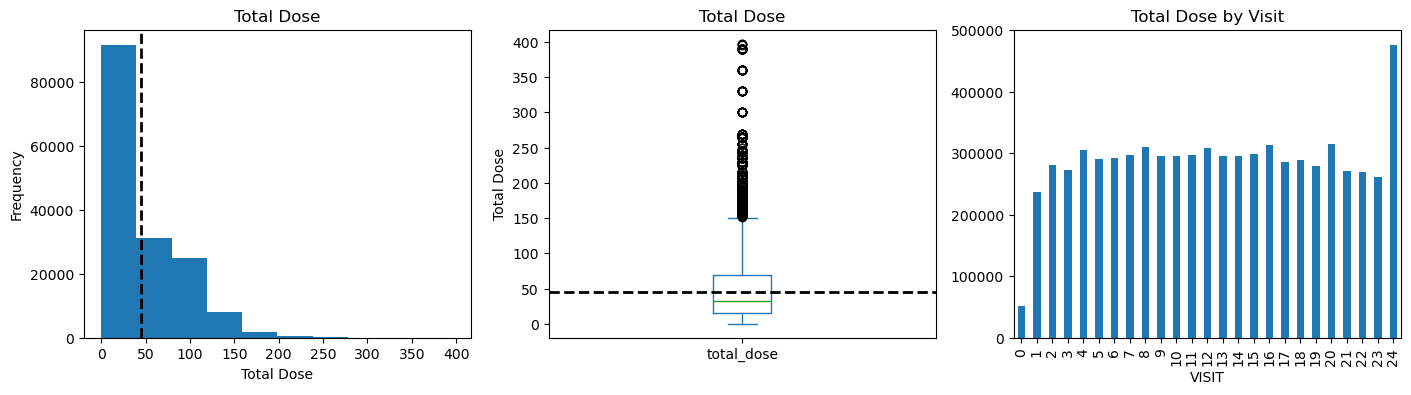

In [10]:
# show distribution of medication dose and outliers
fig, ax = plt.subplots(1,3, figsize=(17,4))
m.total_dose.plot(kind='hist', ax=ax[0], title='Total Dose')
m.total_dose.plot(kind='box', ax=ax[1], title='Total Dose')
m.groupby(['VISIT']).agg({'total_dose':'sum'}).plot(kind='bar', ax=ax[2],figsize=(17,4), title='Total Dose by Visit',legend=False)
#m.medication.value_counts().plot(kind='pie', ax=ax[2], title='Medication', autopct='%1.1f%%')
ax[0].set_xlabel('Total Dose')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Total Dose')
ax[0].axvline(m.total_dose.mean(), color='black', linestyle='--', lw=2)
ax[1].axhline(m.total_dose.mean(), color='black', linestyle='--', lw=2)
ax[2].set_ylabel(None)
plt.show()

In [11]:
# annotate chart
pie = m.medication.value_counts()

In [12]:
# unique data points for total_dose column
print(f'Unique values for total_dose: {m.total_dose.unique().size}')

# show mean, median, min, max for descriptive stats
m.total_dose.describe()[['mean','50%','min','max']]

Unique values for total_dose: 176


mean     45.339715
50%      32.000000
min       0.000000
max     397.000000
Name: total_dose, dtype: float64

### Dive into each column and map values to binary (1 else 0)

In [13]:
# show data types for each column
m.dtypes

patdeid             int64
VISIT               int64
medication        float64
total_dose        float64
admin_location    float64
dtype: object

In [14]:
m.medication.value_counts() # show value counts for medication column

medication
2.0    79571
1.0    79054
Name: count, dtype: int64

In [15]:
# print length of patdeid column, numbe of patients is consistent with CTN protocol
m.patdeid.nunique()

1315

In [16]:
display(m.admin_location.value_counts()) # show value counts for admin_location column
display(m.admin_location.value_counts(normalize=True)) # show percent distribution

admin_location
1.0    137214
2.0     21333
Name: count, dtype: int64

admin_location
1.0    0.865447
2.0    0.134553
Name: proportion, dtype: float64

In [17]:
# location doesn't provide significant predictive value, drop column
m = m.drop(columns=['admin_location'], axis=1)

There appears to be an issues with duplicates; requires further analysis

In [18]:
# sample random patient IDs to see pattern for duplicates

# create feature to pull random sample from patdeid column
def random_patient(df):
    return df.sample(1).patdeid.values[0]


In [19]:
# show view for patients 25 rows at a time
m.loc[m.patdeid==random_patient(m)][25:50]

,patdeid,VISIT,medication,total_dose
149706,1810,4,1.0,90.0
149707,1810,4,1.0,95.0
149708,1810,4,1.0,95.0
149709,1810,5,1.0,95.0
149710,1810,5,1.0,95.0
149711,1810,5,1.0,95.0
149712,1810,5,1.0,95.0
149713,1810,5,1.0,95.0
149714,1810,5,1.0,95.0
149715,1810,5,1.0,95.0


There's a lot of duplication here; but also 0.0 values in the total dose columns<br>

Next steps<br>
1. Change 0.0 values to nan and backfill with fillna() function
2. Work on duplicate records, preserving unique values for patdeid and visit columns

In [20]:
# for medication dose, turn 0.0 to nan, the backfill nan values with previous value
m.total_dose = m.total_dose.replace(0.0, np.nan).fillna(method='bfill')

In [21]:
# check nan values
print(f'Total nan values in total_dose column: {m.loc[m.total_dose.isna()].size}')

Total nan values in total_dose column: 0


In [22]:
# remove duplicates using strategy listed above, view the first 25 records of random patient ids to sample data
m.loc[m.patdeid==random_patient(m)].drop_duplicates(subset=['patdeid','VISIT'], keep='first')[:25]

,patdeid,VISIT,medication,total_dose
134297,1603,0,2.0,8.0
134298,1603,1,2.0,12.0
134316,1603,2,NaN,28.0
134317,1603,3,2.0,28.0
134318,1603,4,2.0,28.0
134331,1603,5,2.0,28.0
134338,1603,6,2.0,28.0
134345,1603,7,2.0,28.0
134350,1603,8,2.0,28.0
134359,1603,9,2.0,32.0


Data looks great, execute drop duplicates

In [23]:
# assign drop duplicates to new m df
m = m.drop_duplicates(subset=['patdeid','VISIT'], keep='first')


In [24]:
# sanity check
m.loc[m.patdeid==random_patient(m)]

,patdeid,VISIT,medication,total_dose
11149,141,0,1.0,30.0
11153,141,1,1.0,40.0
11160,141,2,1.0,50.0
11167,141,3,1.0,60.0
11174,141,4,1.0,60.0
11181,141,5,1.0,70.0
11188,141,6,1.0,70.0
11195,141,7,1.0,70.0
11202,141,8,1.0,70.0
11209,141,9,1.0,80.0


Check other columns for nulls

In [25]:
m.isna().sum() # check for nan values

patdeid          0
VISIT            0
medication    1588
total_dose       0
dtype: int64

In [26]:
# review nulls for patient 1
m.loc[m.patdeid==1][:25]

,patdeid,VISIT,medication,total_dose
0,1,0,2.0,8.0
1,1,1,2.0,16.0
7,1,2,2.0,32.0
17,1,3,2.0,32.0
23,1,4,2.0,32.0
35,1,5,2.0,32.0
38,1,6,2.0,32.0
41,1,7,2.0,32.0
52,1,8,2.0,32.0
56,1,9,2.0,32.0


In [27]:
# frontfill nan for medication column
m.medication = m.medication.fillna(method='ffill')

In [28]:
# look for nans
print(f'Total nan values in medication column: {m.loc[m.medication.isna()].size}')

Total nan values in medication column: 0


In [29]:
m.shape

(23528, 4)

In [30]:
# save to csv to merge
m.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/m_clean.csv', index=False)